In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

Carga el .csv de interés que se analizará

In [2]:
df = pd.read_csv("sample_apex_enriched_csv.csv")
df.tail()

,match_id,my_team,team1_gold,team2_gold,gold_diff,gold_leading_team,my_team_ahead_gold,team1_kills,team2_kills,kill_diff,kill_leading_team,my_team_ahead_kills,tower_fb,drake_fb,herald_fb,my_team_win,winner,tower_fb.1,drake_fb.1,herald_fb.1
1505,LA1_1636311423,100,17434,17172,262,100,False,7,6,1,100,True,200.0,200.0,200.0,True,100,200.0,200.0,200.0
1506,LA1_1636437913,100,17712,18335,-623,200,False,7,11,-4,200,False,100.0,200.0,200.0,False,200,100.0,200.0,200.0
1507,LA1_1637841225,100,16845,15742,1103,100,False,6,4,2,100,True,100.0,200.0,100.0,True,100,100.0,200.0,100.0
1508,LA1_1636370207,100,15364,15587,-223,200,False,4,4,0,0,False,200.0,100.0,100.0,True,100,200.0,100.0,100.0
1509,LA1_1637601349,100,18112,16337,1775,100,False,8,6,2,100,True,100.0,100.0,100.0,False,200,100.0,100.0,100.0


El siguiente bloque se corre si sólo se quiere analizar la diferencia de oro y kills como factores de victoria.

Si se quiere, además, analizar las primeras sangres (recomendado), se omite.

In [ ]:
"""
infod = ['gold_diff', 'kill_diff', 'my_team_win'] 
dfinfo = df[infod]
dfinfo = dfinfo.copy()
dfinfo = dfinfo.copy()
"""

Los siguientes bloques toman sólo las variables que nos interesan

In [ ]:
df['my_team_tower_fb']  = (df['tower_fb']  == df['my_team']).astype(int)
df['my_team_drake_fb']  = (df['drake_fb']  == df['my_team']).astype(int)
df['my_team_herald_fb'] = (df['herald_fb'] == df['my_team']).astype(int)

dfinfo_enriched = df.drop(columns=['tower_fb', 'drake_fb', 'herald_fb'])
# Sacamos las columnas
target = df.pop('my_team_win')  

# Ahora df queda sin 'my_team_win', y la guardamos al final
dfinfo_enriched['my_team_win'] = target

In [7]:
info_needed = ['gold_diff', 'kill_diff', 'my_team_tower_fb','my_team_drake_fb','my_team_herald_fb', 'my_team_win']
dfinfo = dfinfo_enriched[info_needed]
dfinfo

,gold_diff,kill_diff,my_team_tower_fb,my_team_drake_fb,my_team_herald_fb,my_team_win
0,2325,4,0,0,0,True
1,-1032,-3,0,1,0,True
2,-413,0,0,0,1,False
3,2255,6,0,1,1,True
4,2340,2,0,1,1,True
...,...,...,...,...,...,...
1505,262,1,0,0,0,True
1506,-623,-4,1,0,0,False
1507,1103,2,1,0,1,True
1508,-223,0,0,1,1,True


Los siguientes dos bloques generan un heatmap. El primero no considera las primeras sangres, el segundo sí.

El heatmap nos da una idea de qué tanto se relacionan las variables entre sí y nos deja ver desde ya un aproximado de los pesos qu etendrán en el ajuste de regresión logística.

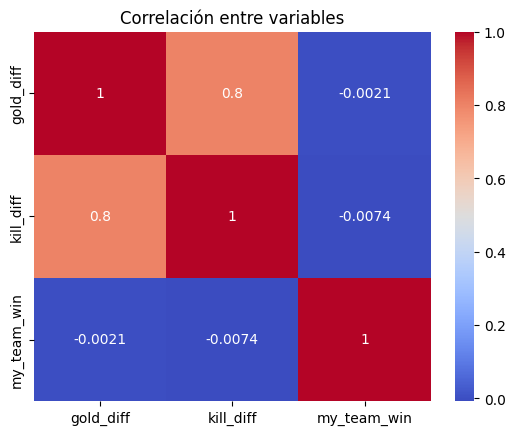

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo columnas numéricas
numeric_cols = dfinfo[[
    "gold_diff", "kill_diff",
    "my_team_win"
]]

# Generamos la matriz de correlación y el heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()



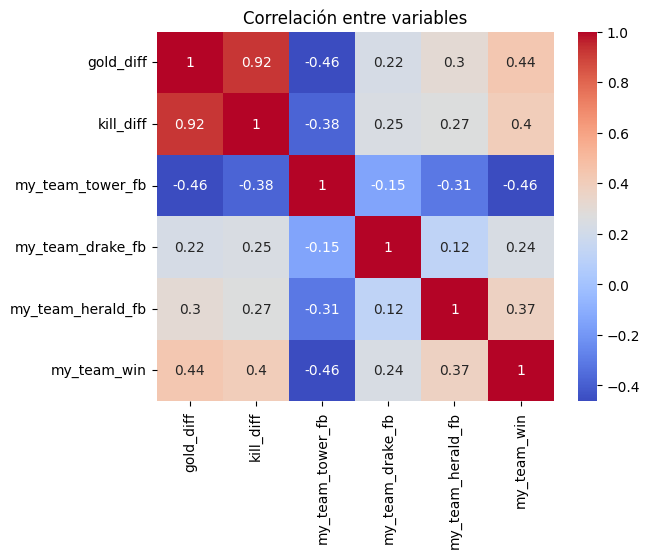

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo columnas numéricas
numeric_cols = dfinfo[[
    "gold_diff", "kill_diff",  'my_team_tower_fb','my_team_drake_fb','my_team_herald_fb', "my_team_win", 
]]

# Generamos la matriz de correlación y el heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()


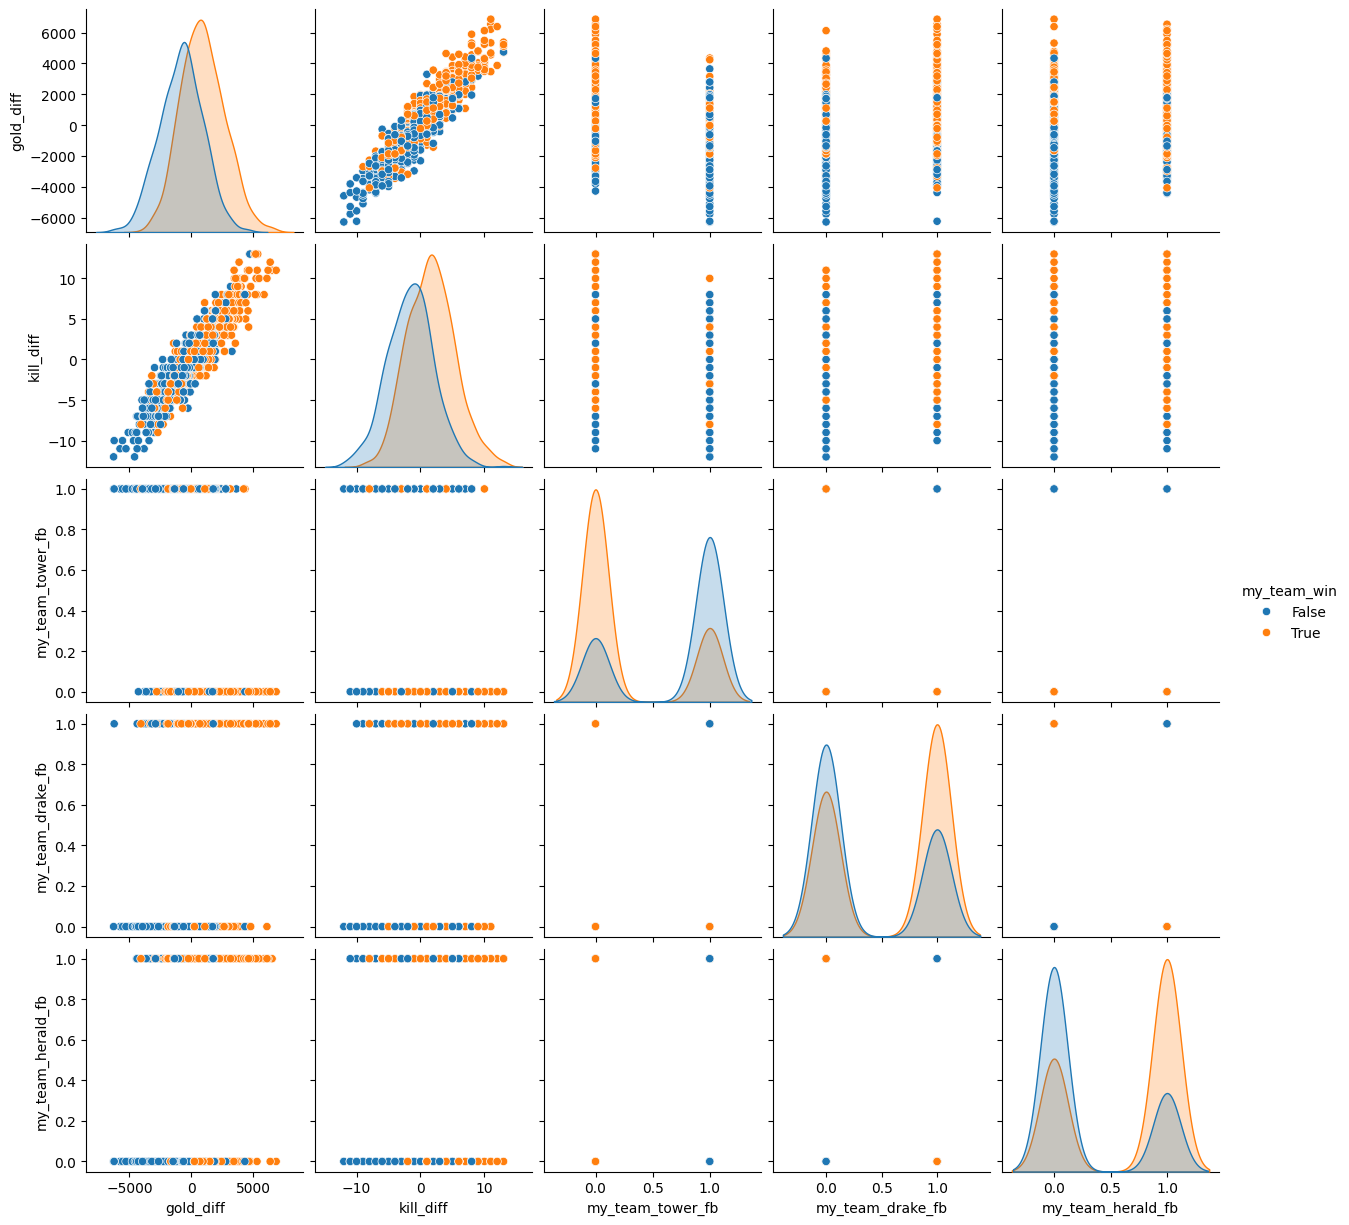

In [10]:
import seaborn as sns
sns.pairplot(dfinfo, hue='my_team_win')


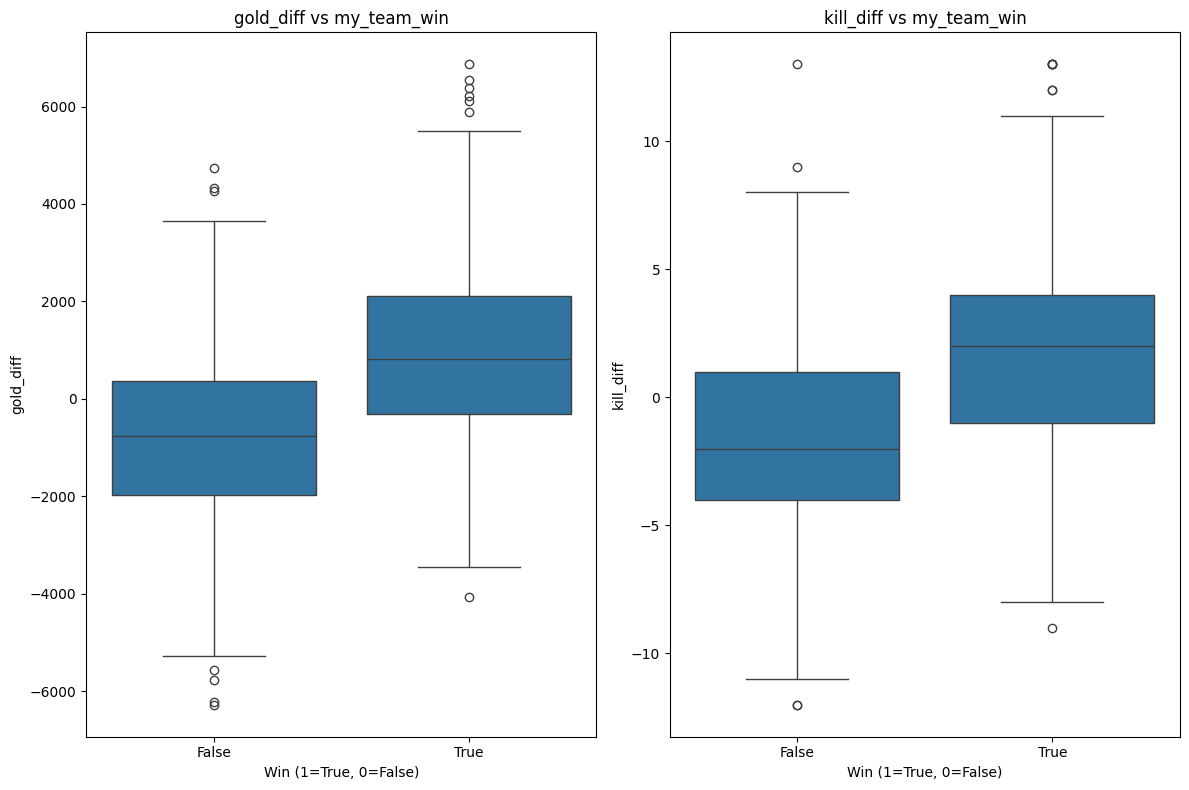

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables que quieres graficar
variables = ['gold_diff', 'kill_diff']

# Creamos subplots (2 filas, 2 columnas en este ejemplo)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes = axes.flatten()  # Para iterar fácilmente

# Graficamos cada boxplot
for i, var in enumerate(variables):
    sns.boxplot(x='my_team_win', y=var, data=dfinfo, ax=axes[i])
    axes[i].set_title(f'{var} vs my_team_win')
    axes[i].set_xlabel('Win (1=True, 0=False)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


In [14]:
dfinfo_path = 'dfinfo_apex_enriched.csv'
dfinfo.to_csv(dfinfo_path, index=False)
print(f"Guardado en {dfinfo_path}")

Guardado en dfinfo_apex_enriched.csv
